# Donor Database Cleaning Project

Database sourced from https://www.kaggle.com/datasets/gaurobsaha/customer-relationship-management-dataset/data

## Dataset Initialization

In [476]:
import google.colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
from pathlib import Path
drive.mount('/content/drive')

DATA = Path('/content/drive/My Drive/Projects/')
df = pd.read_csv(DATA /'Donor.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DonorID             5000 non-null   object 
 1   FirstName           5000 non-null   object 
 2   LastName            5000 non-null   object 
 3   Email               5000 non-null   object 
 4   Phone               5000 non-null   object 
 5   City                5000 non-null   object 
 6   State               5000 non-null   object 
 7   ZipCode             5000 non-null   int64  
 8   LastDonationDate    5000 non-null   object 
 9   TotalGifts          5000 non-null   int64  
 10  TotalAmountDonated  5000 non-null   float64
 11  EventParticipation  5000 non-null   object 
 12  EngagementScore     5000 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 507.9+ KB


In [478]:
# Check for Nulls

df.isnull().sum()

,0
DonorID,0
FirstName,0
LastName,0
Email,0
Phone,0
City,0
State,0
ZipCode,0
LastDonationDate,0
TotalGifts,0


In [479]:
# Check fo Duplicates
df.duplicated().sum()

np.int64(0)

In [480]:
df.dtypes

,0
DonorID,object
FirstName,object
LastName,object
Email,object
Phone,object
City,object
State,object
ZipCode,int64
LastDonationDate,object
TotalGifts,int64


In [481]:
# Change ZipCode to String
df['ZipCode'] = df['ZipCode'].astype(str)

In [482]:
# Change all objects to String

to_string = ['DonorID','FirstName','LastName','Email','Phone','City','State','EventParticipation']

df[to_string] = df[to_string].astype(str)

In [483]:
df.head(10)

,DonorID,FirstName,LastName,Email,Phone,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore
0,D00001,Danielle,Anderson,tina69@salazar.com,(716)033-8417x8760,New Ethan,AK,9539,9/3/2024,10,8481.55,Yes,56
1,D00002,Angel,Hart,garciatyler@gmail.com,(874)907-2648,West Ashleymouth,MS,49618,5/6/2022,5,14102.15,Yes,11
2,D00003,Joshua,Stone,ywoods@gmail.com,105.039.1678x12883,East Stephanie,NJ,6600,1/21/2023,21,5140.38,No,26
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,939.859.3082x278,South Andrewshire,SD,22434,1/26/2023,22,18555.04,Yes,92
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,469-539-5369,Moorestad,DC,16142,5/5/2022,10,1325.93,No,27
5,D00006,Erica,White,hdunn@yahoo.com,232.072.4861x15623,Katherineton,ND,21826,11/1/2022,12,21316.52,No,83
6,D00007,Patricia,Lynch,michael56@allen.org,6780194670,Aprilshire,NH,85934,4/18/2023,10,4970.95,No,57
7,D00008,Christopher,Erickson,robertgoodwin@bradley.com,412-804-4712,Lake Tammiemouth,KS,13873,12/25/2022,29,21862.46,No,27
8,D00009,Robert,Krause,brownsamuel@williams-bailey.com,8362487485,Allenborough,AK,93306,2/17/2023,13,8826.18,Yes,59
9,D00010,Anthony,Smith,catherinemendoza@gmail.com,(237)886-1732x7760,Petersonfurt,WY,54886,8/12/2024,11,18072.64,No,62


# Data Cleaning

In this section, we will focus on cleaning up the data and producing an outreach list for contact verification.

## Assumptions



1.   All Names are inputted correctly.
2.   All Email Usernames are inputted correctly.
3.   All Uncommon Domains (e.g. *salazar.com*) are inputted correctly.
4.   All City names are inputted correctly.
5.   Phone Numbers are 10-digits, with possible extensions if pertinent.
6.   Area codes may be any triple digit numbers.
7.   Phone numbers that meet criteria are accurate and do not need validation.


## Email Cleaning

In this section, we check and correct for any common email address domains for typos.

In [484]:
df['Domain'] = df['Email'].str.split('@').str[1]

In [485]:
my_domains = df['Domain'].value_counts().index.tolist()
my_domains = sorted(my_domains)


In [486]:
type(my_domains)

list

In [487]:
# Check for 'gmail'


filtered_list = []
for domain in my_domains:
    if domain.startswith('g'):  # Now calling startswith on each string
        filtered_list.append(domain)

for value in filtered_list:
    print(value)

gaines.com
gallagher.net
galloway.biz
galvan.com
galvan.info
gamble-lindsey.com
garcia-conrad.com
garcia-dominguez.net
garcia-gomez.com
garcia-knapp.com
garcia-morales.org
garcia-sanchez.biz
garcia-schwartz.biz
garcia.biz
garcia.com
garcia.net
garcia.org
gardner-jensen.net
gardner.com
gardner.org
garner.org
garrett.com
garrison-flowers.biz
garrison-garcia.net
garrison-hurley.info
garrison.com
garza.com
garza.info
george-martin.com
gibbs.com
gibson-adams.com
gibson.biz
gibson.info
gibson.org
gilbert-baird.com
gilbert-stark.com
gilbert.com
gill.com
gillespie-jackson.com
gillespie.net
gilmore.info
glenn.com
glenn.net
glover-brown.net
gmail.com
golden.biz
golden.com
gomez-henry.net
gomez.biz
gomez.com
gomez.info
gomez.net
gonzales.com
gonzales.info
gonzalez-calderon.org
gonzalez-hansen.com
gonzalez-mitchell.net
gonzalez-wise.org
gonzalez.com
gonzalez.info
gonzalez.net
good.org
goodman-white.com
goodman.org
goodwin-allen.com
gordon-robinson.com
gordon-steele.biz
gordon.org
gould-burns.com
g

In [488]:
# Check for 'outlook'


filtered_list = []
for domain in my_domains:
    if domain.startswith('o'):
        filtered_list.append(domain)

for value in filtered_list:
    print(value)

obrien-gallegos.com
obrien.biz
obrien.com
obrien.info
ochoa-cervantes.net
ochoa.com
oconnor-atkinson.com
oconnor.com
odonnell-harris.com
odonnell.com
oliver-gibson.info
oliver-moore.com
oliver.com
olsen-jones.com
olson-jones.biz
olson-nelson.com
olson-simpson.net
olson.com
orr-gordon.com
orr-jones.org
orr.com
ortega-murphy.net
ortiz-hubbard.com
ortiz.com
ortiz.org
osborn.org
owen.com
owen.info
owens-casey.com
owens.com


In [489]:
# Check for icloud


filtered_list = []
for domain in my_domains:
    if domain.startswith('i'):  # Now calling startswith on each string
        filtered_list.append(domain)

for value in filtered_list:
    print(value)

ibarra-garrett.info
ibarra-lane.com
ibarra.com


In [490]:
# Drop intermediate column

df.drop(columns=['Domain'], inplace=True)

In [491]:
df.head(10)

,DonorID,FirstName,LastName,Email,Phone,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore
0,D00001,Danielle,Anderson,tina69@salazar.com,(716)033-8417x8760,New Ethan,AK,9539,9/3/2024,10,8481.55,Yes,56
1,D00002,Angel,Hart,garciatyler@gmail.com,(874)907-2648,West Ashleymouth,MS,49618,5/6/2022,5,14102.15,Yes,11
2,D00003,Joshua,Stone,ywoods@gmail.com,105.039.1678x12883,East Stephanie,NJ,6600,1/21/2023,21,5140.38,No,26
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,939.859.3082x278,South Andrewshire,SD,22434,1/26/2023,22,18555.04,Yes,92
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,469-539-5369,Moorestad,DC,16142,5/5/2022,10,1325.93,No,27
5,D00006,Erica,White,hdunn@yahoo.com,232.072.4861x15623,Katherineton,ND,21826,11/1/2022,12,21316.52,No,83
6,D00007,Patricia,Lynch,michael56@allen.org,6780194670,Aprilshire,NH,85934,4/18/2023,10,4970.95,No,57
7,D00008,Christopher,Erickson,robertgoodwin@bradley.com,412-804-4712,Lake Tammiemouth,KS,13873,12/25/2022,29,21862.46,No,27
8,D00009,Robert,Krause,brownsamuel@williams-bailey.com,8362487485,Allenborough,AK,93306,2/17/2023,13,8826.18,Yes,59
9,D00010,Anthony,Smith,catherinemendoza@gmail.com,(237)886-1732x7760,Petersonfurt,WY,54886,8/12/2024,11,18072.64,No,62


## Cleaning Phone Number

In [492]:
!pip install phonenumbers
import phonenumbers

In [493]:
df['Phone'][1:10]

,Phone
1,(874)907-2648
2,105.039.1678x12883
3,939.859.3082x278
4,469-539-5369
5,232.072.4861x15623
6,6780194670
7,412-804-4712
8,8362487485
9,(237)886-1732x7760


In [494]:
# Define function that splits extension from main number
import re

def split_phone_extension(phone_series):
    # Create new columns
    result = pd.DataFrame()

    # Extract main number (everything before 'x' or the whole number)
    result['main_number'] = phone_series.str.split('x', n=1, expand=True)[0].str.strip()

    # Extract extension (everything after 'x')
    result['extension'] = phone_series.str.split('x', n=1, expand=True)[1].fillna('')

    return result

In [495]:
# Define function that replaces improper numbers with None

import re

def filter_phone(phone):
    if pd.isna(phone):
        return None
    return phone if len(phone) >= 10 else None



In [496]:
def format_phone_number(phone_str):
    if phone_str is None or pd.isna(phone_str) or phone_str == '':
        return None

    # Convert to string and remove any unexpected whitespace
    phone_str = str(phone_str).strip()

    # Handle common US phone number lengths
    if len(phone_str) == 10:
        # Format: (XXX) XXX-XXXX
        return f"({phone_str[:3]}) {phone_str[3:6]}-{phone_str[6:]}"
    elif len(phone_str) == 11 and phone_str[0] == '1':
        # Format: 1 (XXX) XXX-XXXX
        return f"1 ({phone_str[1:4]}) {phone_str[4:7]}-{phone_str[7:]}"
    elif len(phone_str) == 7:
        # Format: XXX-XXXX (local number)
        return f"{phone_str[:3]}-{phone_str[3:]}"
    else:
        # Return original for unusual formats
        return phone_str

In [497]:
# Split extension from main number

split_numbers = split_phone_extension(df['Phone'])

df = pd.concat([df, split_numbers], axis=1)

df.head(10)


,DonorID,FirstName,LastName,Email,Phone,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,main_number,extension
0,D00001,Danielle,Anderson,tina69@salazar.com,(716)033-8417x8760,New Ethan,AK,9539,9/3/2024,10,8481.55,Yes,56,(716)033-8417,8760
1,D00002,Angel,Hart,garciatyler@gmail.com,(874)907-2648,West Ashleymouth,MS,49618,5/6/2022,5,14102.15,Yes,11,(874)907-2648,
2,D00003,Joshua,Stone,ywoods@gmail.com,105.039.1678x12883,East Stephanie,NJ,6600,1/21/2023,21,5140.38,No,26,105.039.1678,12883
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,939.859.3082x278,South Andrewshire,SD,22434,1/26/2023,22,18555.04,Yes,92,939.859.3082,278
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,469-539-5369,Moorestad,DC,16142,5/5/2022,10,1325.93,No,27,469-539-5369,
5,D00006,Erica,White,hdunn@yahoo.com,232.072.4861x15623,Katherineton,ND,21826,11/1/2022,12,21316.52,No,83,232.072.4861,15623
6,D00007,Patricia,Lynch,michael56@allen.org,6780194670,Aprilshire,NH,85934,4/18/2023,10,4970.95,No,57,6780194670,
7,D00008,Christopher,Erickson,robertgoodwin@bradley.com,412-804-4712,Lake Tammiemouth,KS,13873,12/25/2022,29,21862.46,No,27,412-804-4712,
8,D00009,Robert,Krause,brownsamuel@williams-bailey.com,8362487485,Allenborough,AK,93306,2/17/2023,13,8826.18,Yes,59,8362487485,
9,D00010,Anthony,Smith,catherinemendoza@gmail.com,(237)886-1732x7760,Petersonfurt,WY,54886,8/12/2024,11,18072.64,No,62,(237)886-1732,7760


In [498]:
# Eliminate punctuations from number
import string

df['clean_phone_numbers'] = df['main_number'].str.translate(str.maketrans('', '', string.punctuation))


In [499]:
# Apply filter to eliminate improper numbers

df['clean_phone_numbers'] = df['clean_phone_numbers'].apply(filter_phone)

In [500]:
# Check if any numbers less than 10

short_count = 0
for value in df['clean_phone_numbers']:
  if value is not None and len(value) < 10:
    short_count += 1
  else:
    short_count = short_count

print('The count of numbers under 10-digits are: ',short_count)


The count of numbers under 10-digits are:  0


In [501]:
# Check if any numbers more than 10

long_count = 0
for value in df['clean_phone_numbers']:
  if value is not None and len(value) > 10:
    long_count += 1
  else:
    long_count = long_count

print('The count of numbers over 10-digits are: ',long_count)


The count of numbers over 10-digits are:  1402


In [502]:
# Identifying issues with numbers over 10

for value in df['clean_phone_numbers'].head(50):
  if value is not None and len(value) > 10:
    print(value)

# It looks like there are some with the Country code (+001) and others with (+1)

0016395136899
0017416984366
0011845357777
19707839313
17056055738
0015579990072
0018723063657
15932249673
0019443882697
0016908786391
15877707501
12567974631


In [503]:
# Removing International Numbers

df['clean_phone_numbers'] = df['clean_phone_numbers'].apply(
    lambda x: str(x)[-10:] if x is not None and str(x).startswith('001') else x)

df['clean_phone_numbers'] = df['clean_phone_numbers'].apply(
    lambda x: str(x)[-10:] if x is not None and str(x).startswith('1') else x)



In [504]:
# Check issues with numbers over 10

for value in df['clean_phone_numbers'].head(100):
  if value is not None and len(value) > 10:
    print(value)
print('Done')

# It looks like there are some numbers that will need correction. For this exercise, we will remove the values as they are unusable.

Done


In [505]:
# Reformat phone numbers
df['Phone_Number'] = df['clean_phone_numbers'].apply(format_phone_number)
df.head(10)

,DonorID,FirstName,LastName,Email,Phone,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,main_number,extension,clean_phone_numbers,Phone_Number
0,D00001,Danielle,Anderson,tina69@salazar.com,(716)033-8417x8760,New Ethan,AK,9539,9/3/2024,10,8481.55,Yes,56,(716)033-8417,8760,7160338417,(716) 033-8417
1,D00002,Angel,Hart,garciatyler@gmail.com,(874)907-2648,West Ashleymouth,MS,49618,5/6/2022,5,14102.15,Yes,11,(874)907-2648,,8749072648,(874) 907-2648
2,D00003,Joshua,Stone,ywoods@gmail.com,105.039.1678x12883,East Stephanie,NJ,6600,1/21/2023,21,5140.38,No,26,105.039.1678,12883,1050391678,(105) 039-1678
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,939.859.3082x278,South Andrewshire,SD,22434,1/26/2023,22,18555.04,Yes,92,939.859.3082,278,9398593082,(939) 859-3082
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,469-539-5369,Moorestad,DC,16142,5/5/2022,10,1325.93,No,27,469-539-5369,,4695395369,(469) 539-5369
5,D00006,Erica,White,hdunn@yahoo.com,232.072.4861x15623,Katherineton,ND,21826,11/1/2022,12,21316.52,No,83,232.072.4861,15623,2320724861,(232) 072-4861
6,D00007,Patricia,Lynch,michael56@allen.org,6780194670,Aprilshire,NH,85934,4/18/2023,10,4970.95,No,57,6780194670,,6780194670,(678) 019-4670
7,D00008,Christopher,Erickson,robertgoodwin@bradley.com,412-804-4712,Lake Tammiemouth,KS,13873,12/25/2022,29,21862.46,No,27,412-804-4712,,4128044712,(412) 804-4712
8,D00009,Robert,Krause,brownsamuel@williams-bailey.com,8362487485,Allenborough,AK,93306,2/17/2023,13,8826.18,Yes,59,8362487485,,8362487485,(836) 248-7485
9,D00010,Anthony,Smith,catherinemendoza@gmail.com,(237)886-1732x7760,Petersonfurt,WY,54886,8/12/2024,11,18072.64,No,62,(237)886-1732,7760,2378861732,(237) 886-1732


In [506]:
# Add extensions - excludes NaN, empty strings, and strings with only whitespace

mask = df['extension'].notna() & (df['extension'].str.strip() != '')
df.loc[mask, 'Phone_Number'] = df['Phone_Number'] + ' x' + df['extension']


In [507]:
df.head(10)

,DonorID,FirstName,LastName,Email,Phone,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,main_number,extension,clean_phone_numbers,Phone_Number
0,D00001,Danielle,Anderson,tina69@salazar.com,(716)033-8417x8760,New Ethan,AK,9539,9/3/2024,10,8481.55,Yes,56,(716)033-8417,8760,7160338417,(716) 033-8417 x8760
1,D00002,Angel,Hart,garciatyler@gmail.com,(874)907-2648,West Ashleymouth,MS,49618,5/6/2022,5,14102.15,Yes,11,(874)907-2648,,8749072648,(874) 907-2648
2,D00003,Joshua,Stone,ywoods@gmail.com,105.039.1678x12883,East Stephanie,NJ,6600,1/21/2023,21,5140.38,No,26,105.039.1678,12883,1050391678,(105) 039-1678 x12883
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,939.859.3082x278,South Andrewshire,SD,22434,1/26/2023,22,18555.04,Yes,92,939.859.3082,278,9398593082,(939) 859-3082 x278
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,469-539-5369,Moorestad,DC,16142,5/5/2022,10,1325.93,No,27,469-539-5369,,4695395369,(469) 539-5369
5,D00006,Erica,White,hdunn@yahoo.com,232.072.4861x15623,Katherineton,ND,21826,11/1/2022,12,21316.52,No,83,232.072.4861,15623,2320724861,(232) 072-4861 x15623
6,D00007,Patricia,Lynch,michael56@allen.org,6780194670,Aprilshire,NH,85934,4/18/2023,10,4970.95,No,57,6780194670,,6780194670,(678) 019-4670
7,D00008,Christopher,Erickson,robertgoodwin@bradley.com,412-804-4712,Lake Tammiemouth,KS,13873,12/25/2022,29,21862.46,No,27,412-804-4712,,4128044712,(412) 804-4712
8,D00009,Robert,Krause,brownsamuel@williams-bailey.com,8362487485,Allenborough,AK,93306,2/17/2023,13,8826.18,Yes,59,8362487485,,8362487485,(836) 248-7485
9,D00010,Anthony,Smith,catherinemendoza@gmail.com,(237)886-1732x7760,Petersonfurt,WY,54886,8/12/2024,11,18072.64,No,62,(237)886-1732,7760,2378861732,(237) 886-1732 x7760


In [508]:
# Clean up intermediary columns

intermediary_columns = ['main_number', 'extension', 'clean_phone_numbers', 'Phone']
df.drop(columns=intermediary_columns, inplace=True)

# Rename column
df.rename(columns={'Phone_Number': 'Phone'}, inplace=True)

df.head(10)

,DonorID,FirstName,LastName,Email,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,Phone
0,D00001,Danielle,Anderson,tina69@salazar.com,New Ethan,AK,9539,9/3/2024,10,8481.55,Yes,56,(716) 033-8417 x8760
1,D00002,Angel,Hart,garciatyler@gmail.com,West Ashleymouth,MS,49618,5/6/2022,5,14102.15,Yes,11,(874) 907-2648
2,D00003,Joshua,Stone,ywoods@gmail.com,East Stephanie,NJ,6600,1/21/2023,21,5140.38,No,26,(105) 039-1678 x12883
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,South Andrewshire,SD,22434,1/26/2023,22,18555.04,Yes,92,(939) 859-3082 x278
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,Moorestad,DC,16142,5/5/2022,10,1325.93,No,27,(469) 539-5369
5,D00006,Erica,White,hdunn@yahoo.com,Katherineton,ND,21826,11/1/2022,12,21316.52,No,83,(232) 072-4861 x15623
6,D00007,Patricia,Lynch,michael56@allen.org,Aprilshire,NH,85934,4/18/2023,10,4970.95,No,57,(678) 019-4670
7,D00008,Christopher,Erickson,robertgoodwin@bradley.com,Lake Tammiemouth,KS,13873,12/25/2022,29,21862.46,No,27,(412) 804-4712
8,D00009,Robert,Krause,brownsamuel@williams-bailey.com,Allenborough,AK,93306,2/17/2023,13,8826.18,Yes,59,(836) 248-7485
9,D00010,Anthony,Smith,catherinemendoza@gmail.com,Petersonfurt,WY,54886,8/12/2024,11,18072.64,No,62,(237) 886-1732 x7760


## Zip Code Cleaning

In [509]:
for values in df['ZipCode']:
  if values is not None and len(values) != 5:
    df['ZipCode'] = df['ZipCode'].replace(values, None)


In [510]:
df.head(10)

,DonorID,FirstName,LastName,Email,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,Phone
0,D00001,Danielle,Anderson,tina69@salazar.com,New Ethan,AK,None,9/3/2024,10,8481.55,Yes,56,(716) 033-8417 x8760
1,D00002,Angel,Hart,garciatyler@gmail.com,West Ashleymouth,MS,49618,5/6/2022,5,14102.15,Yes,11,(874) 907-2648
2,D00003,Joshua,Stone,ywoods@gmail.com,East Stephanie,NJ,None,1/21/2023,21,5140.38,No,26,(105) 039-1678 x12883
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,South Andrewshire,SD,22434,1/26/2023,22,18555.04,Yes,92,(939) 859-3082 x278
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,Moorestad,DC,16142,5/5/2022,10,1325.93,No,27,(469) 539-5369
5,D00006,Erica,White,hdunn@yahoo.com,Katherineton,ND,21826,11/1/2022,12,21316.52,No,83,(232) 072-4861 x15623
6,D00007,Patricia,Lynch,michael56@allen.org,Aprilshire,NH,85934,4/18/2023,10,4970.95,No,57,(678) 019-4670
7,D00008,Christopher,Erickson,robertgoodwin@bradley.com,Lake Tammiemouth,KS,13873,12/25/2022,29,21862.46,No,27,(412) 804-4712
8,D00009,Robert,Krause,brownsamuel@williams-bailey.com,Allenborough,AK,93306,2/17/2023,13,8826.18,Yes,59,(836) 248-7485
9,D00010,Anthony,Smith,catherinemendoza@gmail.com,Petersonfurt,WY,54886,8/12/2024,11,18072.64,No,62,(237) 886-1732 x7760


## Pulling Report for Contact Validation


In [511]:
# Creating the Report for Incorrect Zipcode and Missing Phone Numbers

to_contact_df = df[df['Phone'].isna() | df['ZipCode'].isna()].copy()
to_contact_df.head(10)

,DonorID,FirstName,LastName,Email,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,Phone
0,D00001,Danielle,Anderson,tina69@salazar.com,New Ethan,AK,None,9/3/2024,10,8481.55,Yes,56,(716) 033-8417 x8760
2,D00003,Joshua,Stone,ywoods@gmail.com,East Stephanie,NJ,None,1/21/2023,21,5140.38,No,26,(105) 039-1678 x12883
12,D00013,Anthony,Wilson,luis88@brown.org,New Brett,MN,None,11/7/2024,8,3183.40,No,16,(184) 535-7777 x85929
18,D00019,Lisa,Castro,walkernicolas@hotmail.com,Heatherburgh,NC,85778,5/19/2023,27,24412.71,No,65,None
23,D00024,Eric,Tyler,francisco67@hotmail.com,East Tara,MA,34919,4/10/2022,11,17565.92,No,91,None
43,D00044,Keith,Herrera,hhopkins@stewart-lee.org,Jasmineton,NM,45307,11/11/2022,1,2576.26,Yes,95,None
50,D00051,Mitchell,Hardy,barneskathy@conrad.com,Hannahside,VT,None,11/9/2022,27,2727.84,Yes,20,(012) 893-4828 x0092
62,D00063,Angela,Sims,middletonelizabeth@gmail.com,Anthonyburgh,GA,None,12/28/2024,6,4699.92,No,91,(824) 055-4651 x206
66,D00067,Jeremy,Larson,wallaceryan@miller-taylor.com,West Jessica,ND,None,9/14/2023,5,3418.68,No,31,(787) 305-3900
73,D00074,Leonard,Crawford,mary47@robles-myers.com,Smithtown,WI,None,5/10/2022,5,12233.99,No,17,None


In [512]:
# Creating a file to contact

to_contact_df.to_csv(DATA/'Contact_Validation_Report.csv', index=False)
print('Done')

Done


# Donation Outreach

In this section, we explore the donor database to see and identify probably repeat donors.

## Create Recency Variable

In [513]:
# Convert Donation Date to datetime format
df['LastDonationDate'] = pd.to_datetime(df['LastDonationDate'])

In [514]:
df['Recency'] = (pd.Timestamp.now() - df['LastDonationDate']).dt.days
df.head(5)

,DonorID,FirstName,LastName,Email,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,Phone,Recency
0,D00001,Danielle,Anderson,tina69@salazar.com,New Ethan,AK,None,2024-09-03,10,8481.55,Yes,56,(716) 033-8417 x8760,409
1,D00002,Angel,Hart,garciatyler@gmail.com,West Ashleymouth,MS,49618,2022-05-06,5,14102.15,Yes,11,(874) 907-2648,1260
2,D00003,Joshua,Stone,ywoods@gmail.com,East Stephanie,NJ,None,2023-01-21,21,5140.38,No,26,(105) 039-1678 x12883,1000
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,South Andrewshire,SD,22434,2023-01-26,22,18555.04,Yes,92,(939) 859-3082 x278,995
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,Moorestad,DC,16142,2022-05-05,10,1325.93,No,27,(469) 539-5369,1261


## Explorartory Data Analysis

In [515]:
import matplotlib.pyplot as plt
import seaborn as sns

In [516]:
df.describe()

,LastDonationDate,TotalGifts,TotalAmountDonated,EngagementScore,Recency
count,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2023-09-12 20:00:23.040000,15.261400,12350.097270,50.899600,765.166400
min,2022-03-21 00:00:00,1.000000,21.320000,1.000000,211.000000
25%,2022-12-11 18:00:00,8.000000,6248.907500,26.000000,498.000000
50%,2023-09-13 00:00:00,15.000000,12304.270000,51.000000,765.000000
75%,2024-06-06 00:00:00,22.000000,18440.480000,76.000000,1040.250000
max,2025-03-20 00:00:00,29.000000,24991.840000,100.000000,1306.000000
std,NaN,8.292504,7133.844628,28.996284,314.496755


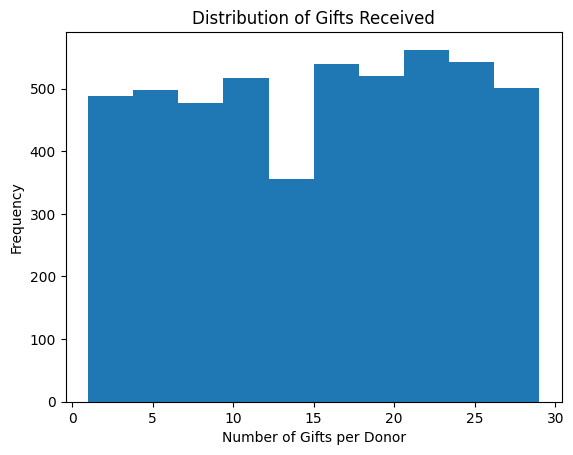

In [517]:
# Create histogram of TotalGifts
plt.hist(df['TotalGifts'])

plt.title('Distribution of Gifts Received')
plt.xlabel('Number of Gifts per Donor')
plt.ylabel('Frequency')

plt.show()

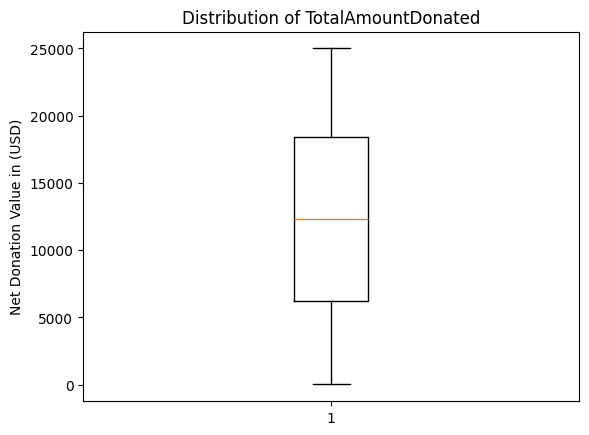

In [518]:
# Create boxplot of TotalAmountDonated
plt.boxplot(df['TotalAmountDonated'])

plt.title('Distribution of TotalAmountDonated')
plt.ylabel('Net Donation Value in (USD)')

plt.show()

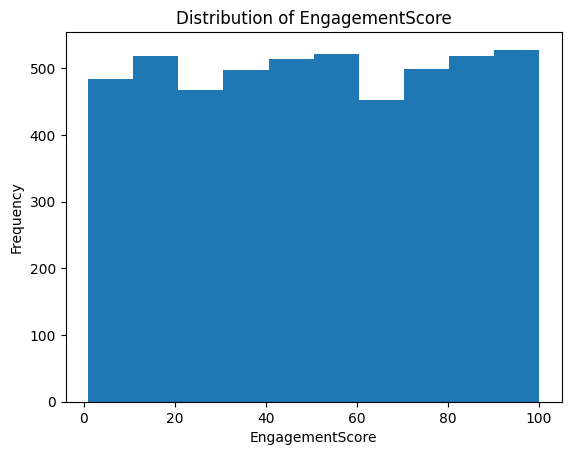

In [519]:
# Create histogram of TotalGifts
plt.hist(df['EngagementScore'])

plt.title('Distribution of EngagementScore')
plt.xlabel('EngagementScore')
plt.ylabel('Frequency')

plt.show()

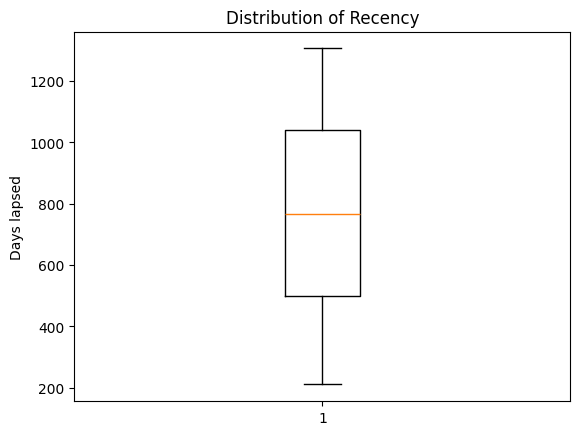

In [520]:
# Create boxplot of Recency
plt.boxplot(df['Recency'])

plt.title('Distribution of Recency')
plt.ylabel('Days lapsed')

plt.show()

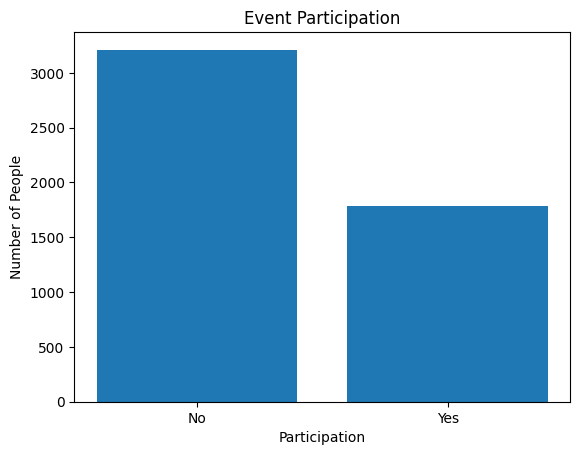

In [521]:
# Create the bar chart

value_counts = df['EventParticipation'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.title('Event Participation')
plt.xlabel('Participation')
plt.ylabel('Number of People')
plt.show()


## Establishing a Scoring System

Because we do not have historical data for this, we will need to create weights for how important each variable will affect likeliness to be a repeat donor.

In [522]:
# Creating Dummy Variable for EventParticipation

df['EventParticipation'] = df['EventParticipation'].map({'Yes': 1, 'No': 0})

In [523]:
# Normalizing values for processingS

from sklearn.preprocessing import MinMaxScaler

df2 = df.copy()

scaler = MinMaxScaler()
score_columns = ['Recency', 'TotalGifts', 'TotalAmountDonated', 'EngagementScore']
df2[score_columns] = scaler.fit_transform(df2[score_columns])

In [524]:
# Creating the Donor Score with Weights

df['DonorScore'] = (
    (0.35 * df2['Recency']) +           # Most important - recent donors
    (0.25 * df2['TotalGifts']) +        # Frequency matters
    (0.20 * df2['TotalAmountDonated']) + # Lifetime value
    (0.10 * df2['EventParticipation']) + # Engagement
    (0.10 * df2['EngagementScore'])     # Overall involvement
)

In [526]:
df.sort_values(by='DonorScore', ascending=False).head(5)

,DonorID,FirstName,LastName,Email,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,Phone,Recency,DonorScore
1149,D01150,Brian,Schaefer,ashley77@padilla.biz,Port Joseph,PA,80700,2022-04-19,29,22641.44,1,52,(460) 664-9323 x7558,1277,0.923420
2165,D02166,Paige,Harris,jake58@chapman.com,South Robertside,WI,72378,2022-07-12,26,24526.12,1,75,(888) 507-3257 x9162,1193,0.908113
4768,D04769,Angela,Sanchez,natalie04@yahoo.com,North Matthewchester,FL,23159,2022-09-18,28,23739.45,1,78,(324) 125-4960,1125,0.900964
4987,D04988,Jessica,Johnson,jeffrey30@evans.com,Jackmouth,NV,88236,2022-08-12,27,20482.73,1,100,(796) 756-6376,1162,0.900000
3880,D03881,Jeffrey,Grant,donna42@carlson.com,Markton,VT,27007,2022-06-25,27,23925.65,1,48,(814) 302-3459 x992,1210,0.890393


## Pulling Report for Funding Outreach

For this report, we are going to assume that we want to reach out to donors who are more than 80% likely to engage to save on outreach costs and expenses.

In [528]:
df_outreach = df[df['DonorScore'] >= 0.8].copy()
df_outreach = df_outreach.sort_values(by='DonorScore', ascending=False)
df_outreach.head(5)

,DonorID,FirstName,LastName,Email,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore,Phone,Recency,DonorScore
1149,D01150,Brian,Schaefer,ashley77@padilla.biz,Port Joseph,PA,80700,2022-04-19,29,22641.44,1,52,(460) 664-9323 x7558,1277,0.923420
2165,D02166,Paige,Harris,jake58@chapman.com,South Robertside,WI,72378,2022-07-12,26,24526.12,1,75,(888) 507-3257 x9162,1193,0.908113
4768,D04769,Angela,Sanchez,natalie04@yahoo.com,North Matthewchester,FL,23159,2022-09-18,28,23739.45,1,78,(324) 125-4960,1125,0.900964
4987,D04988,Jessica,Johnson,jeffrey30@evans.com,Jackmouth,NV,88236,2022-08-12,27,20482.73,1,100,(796) 756-6376,1162,0.900000
3880,D03881,Jeffrey,Grant,donna42@carlson.com,Markton,VT,27007,2022-06-25,27,23925.65,1,48,(814) 302-3459 x992,1210,0.890393


In [529]:
df_outreach.to_csv(DATA/'Donor_Outreach_Report.csv', index=False)
print('Done')

Done
